In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

Dataset: kaggle.com/datasets/rtatman/188-million-us-wildfires?resource=download

Code reference: stackoverflow.com/questions/41246127/how-to-create-pandas-data-frame-from-sqlite

In [59]:
con = sqlite3.connect('../data/FPA_FOD_20170508.sqlite')

df = pd.read_sql('select FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR, LATITUDE, LONGITUDE,STATE, COUNTY from fires', con)

In [60]:
#It would simplify things to stick to continental US
df = df[df.STATE != 'PR']
df = df[df.STATE != 'AK']
df = df[df.STATE != 'HI']
df.to_csv('../data/dataset.csv',index=False)
df.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
FIRE_SIZE                0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
COUNTY              643450
dtype: int64

In [21]:
df_dropna=df.dropna()

In [22]:
df_dropna['counter']=[1 for i in df_dropna['LATITUDE'].tolist()]

C:\Users\raild\AppData\Local\Temp\ipykernel_16548\1727078301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['counter']=[1 for i in df_dropna['LATITUDE'].tolist()]


In [63]:
#df['counter']=[1 for i in df['LATITUDE'].tolist()]
#grouped_multiple = df.groupby(['COUNTY', 'STATE']).agg({'counter': ['sum']})
#grouped_multiple.columns = ['counter_sum']
#grouped_multiple = grouped_multiple.reset_index().sort_values('counter_sum', ascending=False)
#print(grouped_multiple.head(40))
#Null counties do not appear as the most hazardous counties

#https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [64]:
df_loc=df[['LATITUDE','LONGITUDE']]
df_loc.columns=['latitude','longitude']

In [80]:
BBox = ((df_loc.longitude.min(),   df_loc.longitude.max(),df_loc.latitude.min(), df_loc.latitude.max()))

In [82]:
ruh_m = plt.imread('map2.png')
BBox

(-124.71861, -66.970889, 24.58166997, 49.34335784)

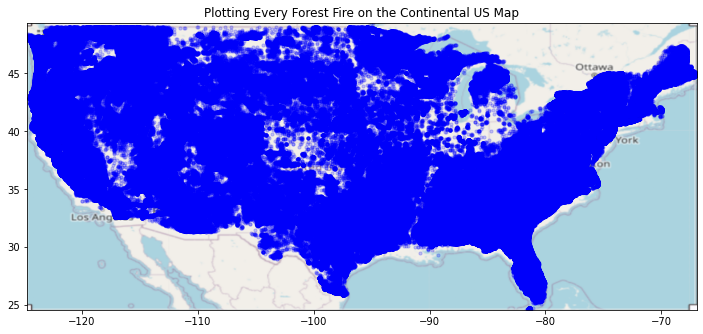

In [87]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(df_loc.longitude, df_loc.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Every Forest Fire on the Continental US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Given extended period of time, it is expected that the entire map is covered by markers. 

In [26]:
df.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'FIRE_SIZE', 'STAT_CAUSE_DESCR',
       'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY'],
      dtype='object')

In [19]:
df.sort_values('LONGITUDE',ascending=True)

,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,COUNTY
245150,1994,2449581.5,0.10,Campfire,48.148620,-124.718610,WA,None
245197,1996,2450308.5,0.10,Campfire,48.146980,-124.717090,WA,None
245106,1994,2449563.5,0.10,Campfire,48.178270,-124.710480,WA,None
245077,1993,2449237.5,0.10,Campfire,48.178540,-124.709090,WA,None
245165,1995,2449874.5,0.10,Campfire,48.126090,-124.708310,WA,None
...,...,...,...,...,...,...,...,...
1721193,2011,2455649.5,5.00,Missing/Undefined,18.306847,-65.264175,PR,None
1716955,2009,2454941.5,0.50,Missing/Undefined,18.306847,-65.264175,PR,None
1711296,2006,2453808.5,0.25,Missing/Undefined,18.306847,-65.264175,PR,None
1710955,2006,2453796.5,3.50,Missing/Undefined,18.306847,-65.264175,PR,None


Code reference: 
https://jamesrledoux.com/code/group-by-aggregate-pandas

In [31]:
grouped_multiple = df_dropna.groupby(['COUNTY', 'STATE']).agg({'counter': ['sum']})
grouped_multiple.columns = ['counter_sum']
grouped_multiple = grouped_multiple.reset_index().sort_values('counter_sum', ascending=False)
print(grouped_multiple.head(40))
grouped_multiple.to_csv('fire_hazzard_by_county.csv',index=False)

           COUNTY STATE  counter_sum
5062      SUFFOLK    NY         7372
1092            5    AZ         5943
4439        Ocean    NJ         4937
4101    McCurtain    OK         4039
4716         Polk    FL         4010
5268    St. Louis    MN         3895
3963       MONROE    NY         3552
4415       ORANGE    NY         3519
5567      Volusia    FL         3402
4900    Riverside    CA         3274
1543     Atlantic    NJ         3237
5224        Smith    TX         3106
4811    RIVERSIDE    CA         3084
5132   Santa Rosa    FL         3020
4310       NASSAU    NY         2940
4820     ROCKLAND    NY         2854
2605         ERIE    NY         2849
4944         Rusk    TX         2793
4774   Pushmataha    OK         2788
5525       Upshur    TX         2717
3744          Lee    FL         2639
1080           49    ID         2620
3714      Laurens    GA         2578
4214       Mohave    AZ         2568
2173     Cherokee    TX         2545
3768         Levy    FL         2496
4

In [ ]:
us_map = states.boundary.plot(figsize=(25, 14),  color="#555555", linewidth=1)
us_map.axis('off')

http://hanschen.org/koppen#download-data
It is a climate zone dataset. With this it should be possible to assign a climate zone to every coordinate

In [4]:
koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)

C:\Users\raild\AppData\Local\Temp\ipykernel_16548\375202209.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)


In [3]:
print("The Koppen type at {} latitude and {} longitude is {}".format(
        koppen['latitude'][2], koppen['longitude'][2], koppen['p1901_2010'][2]))

The Koppen type at 68.25 latitude and -179.75 longitude is b'ET'


In [5]:
koppen['latitude'][2], koppen['longitude'][2], koppen['p1901_2010'][2]

(68.25, -179.75, b'ET')

In [34]:
[koppen['latitude'][2], koppen['longitude'][2], koppen['p1901_2010'][2]

SyntaxError: unexpected EOF while parsing (267396588.py, line 1)

In [40]:
new_df=pd.DataFrame(koppen)
str(new_df['p1901_2010'].tolist()[4])


"b'ET'"

In [54]:
def find_climate(lat,long):
    distance=5000
    koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)
    new_df=pd.DataFrame(koppen)
    new_df=new_df[new_df['longitude']>17.4]
    new_df=new_df[new_df['longitude']<50]
    new_df=new_df[new_df['latitude']<-65]
    new_df=new_df[new_df['latitude']>-125]
    for i in range(len(new_df['longitude'].tolist())):
        if (lat-new_df['latitude'].tolist()[i])**2+(long-new_df['longitude'].tolist()[i])**2<distance:
            distance=(lat-new_df['latitude'].tolist()[i])**2+(long-new_df['longitude'].tolist()[i])**2
            output_index=i
    return str(new_df['p1901_2010'].tolist()[output_index]).replace("b","").replace("'","")
    

In [55]:
find_climate(-80,30)

C:\Users\raild\AppData\Local\Temp\ipykernel_16548\4019604478.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)


'EF'

In [68]:
#df['climate_zone']=[find_climate(df['LONGITUDE'].tolist()[i],df['LATITUDE'].tolist()[i]) for i in range (len(df['LATITUDE'].tolist()))]
#code works, but takes extremely long to complete

In [90]:
df['STAT_CAUSE_DESCR'].value_counts(normalize=True)

Debris Burning       0.232423
Miscellaneous        0.175579
Arson                0.152995
Lightning            0.149456
Equipment Use        0.080211
Missing/Undefined    0.073139
Campfire             0.040600
Children             0.033012
Smoking              0.028654
Railroad             0.018218
Powerline            0.007656
Fireworks            0.006177
Structure            0.001879
Name: STAT_CAUSE_DESCR, dtype: float64

In [104]:
df_by_year=df.groupby('FIRE_YEAR').sum()


Int64Index([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015],
           dtype='int64', name='FIRE_YEAR')

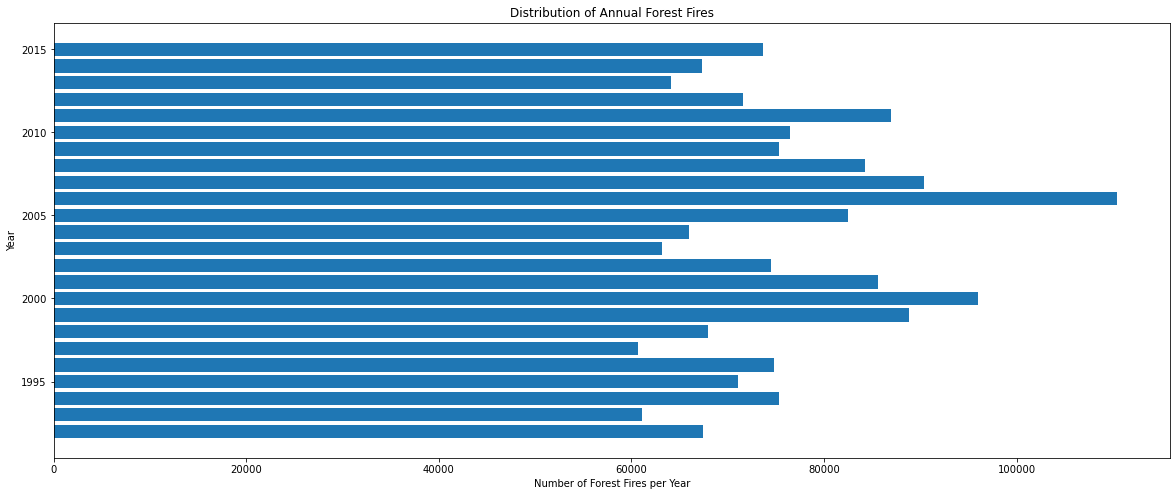

In [107]:
plt.figure(figsize=(20,8))
plt.barh(df_by_year.index,df_by_year['counter'])

plt.xlabel('Number of Forest Fires per Year') 
plt.ylabel('Year') 
plt.title("Distribution of Annual Forest Fires");